# Análisis de tiempos de espera en el paradero de transporte publico de la Universidad Tecnológica de bolívar.

# Aplicación de todas las librerías

In [66]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as st
from scipy import stats
from scipy.stats import norm
from sklearn import linear_model
import warnings
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import re

# Lectura del dataset
# Observación de los diagramas de dispersión

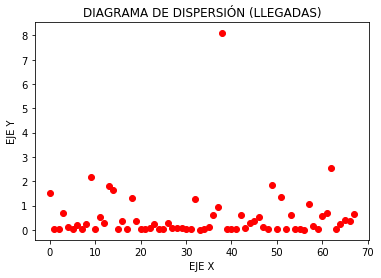

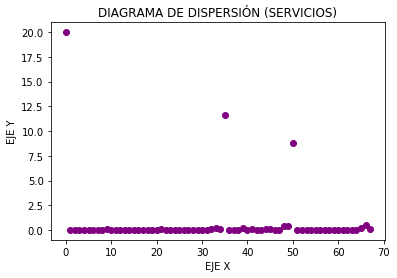

In [67]:
ai = [] #Tiempos de llegada
si = [] #Tiempo de servicio

def Archivo ():
    vector = [] #Contenedor de ambas columnas
    data = open ('data1.txt', 'r') #Apertura del archivo
    for i in data.readlines(): #Recorrera todos los valores del archivo
        vector.append(re.findall(r'[\d]+[.][\d]+',i))#Identificar todo aquello que sea numero
    return np.array(vector,dtype=float)

vector = Archivo() #Se guarda el procesado de la función
align = pd.DataFrame (vector) #Tabula los datos a columnas y filas

#Asignación de columnas
ai = vector[:,0]
si = vector[:,1]
eX = np.array([[i]for i in range(len(vector))])
#Vector del tamaño del archivo con números del 1 hasta el rango total

n=0
y=[]
for i in range(len(vector)):
    if n==0: y.append(float(vector[i][0]))
    else: y.append(float(vector[i][0])-float(vector[i-1][0]))
    n+=1
    

plt.scatter(eX, y, color = "red") 
plt.xlabel('EJE X')
plt.title("DIAGRAMA DE DISPERSIÓN (LLEGADAS)")
plt.ylabel('EJE Y')
plt.show()

plt.scatter(eX, si, color = "purple") 
plt.xlabel('EJE X')
plt.title("DIAGRAMA DE DISPERSIÓN (SERVICIOS)")
plt.ylabel('EJE Y')
plt.show()

# Implementación del servidor de cola única (SSS)

In [68]:
#Nuestro servidor de cola única     
def SSS(ai,si):

    i = 0 #jobs
    di = [] #delay time
    Ci = []
    Co = 0.0 #Salida inicial

    n = len(ai) #Tamaño de la lista generada
    while (i<n):
    
        if (ai[i] < Co):
            aux = Co-ai[i]
            di.append(aux)

        else:
            aux = 0.0
            di.append(aux)

        Ci.append(ai[i]+di[i]+si[i])
        Co = Ci[i]

        i = i+1
    return di, Co

# Intervalos de confianza

In [69]:
#Calculamos los intervalos de confianza
def confidence_interval(datos, confidence = 0.95):


    a = 1*np.array(datos)
    n = len (a)
    m, se = np.mean(a), sp.stats.sem(a)
    h = se* sp.stats.t._ppf((1+confidence)/2., n-1)

    #Guardamos la media, el valor inicial y de ultimo el final
    return m, m-h, m+h

# Regresión lineal para los datos de llegada y servicio


			REGRESIÓN LINEAL PARA LOS TIEMPOS DE LLEGADA


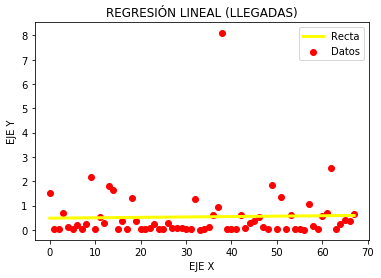

Intercepto  0.48006649616368297
Pendiente  [0.00165298]
Precisión del modelo:  0.0008827848366098623



			REGRESIÓN LINEAL PARA LOS TIEMPOS DE SERVICIO


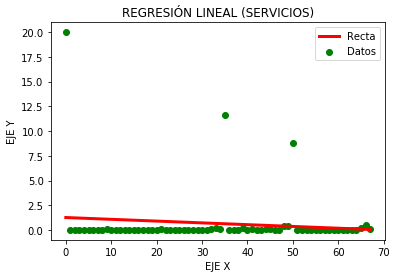

Intercepto  1.2714251918158563
Pendiente  [-0.01797402]
Precisión del modelo:  -0.1386031986302696




In [70]:
def linearRegression ():
    
    # Creo un modelo de regresión lineal
    modelo = linear_model.LinearRegression()
    # Entreno el modelo con los datos (X,Y)
    #Se usa para ajustar los datos, hace que el ajuste sea simple
    modelo.fit(eX, y)
    y_pred = modelo.predict(eX)

    #Se hace la dispersión 
    print ("\n\t\t\tREGRESIÓN LINEAL PARA LOS TIEMPOS DE LLEGADA")
    plt.scatter(eX, y, label = "Datos", color = "red")
    plt.xlabel("EJE X")
    plt.ylabel("EJE Y")
    plt.title("REGRESIÓN LINEAL (LLEGADAS)")
    #Se proce a trasar el intercepto
    plt.plot(eX, y_pred, color='yellow', linewidth = 3, label = "Recta")
    plt.legend()
    plt.show()

    print("Intercepto ", modelo.intercept_)#Valor del intercepto
    print("Pendiente ", modelo.coef_)
    print("Precisión del modelo: ", r2_score(y, y_pred))
    print ("\n")

    modelo.fit(eX, si)
    y_pred = modelo.predict(eX)

    #Se hace la dispersión 
    print ("\n\t\t\tREGRESIÓN LINEAL PARA LOS TIEMPOS DE SERVICIO")
    plt.scatter(eX, si, label = "Datos", color = "green")
    plt.xlabel("EJE X")
    plt.ylabel("EJE Y")
    plt.title("REGRESIÓN LINEAL (SERVICIOS)")
    #Se proce a trasar el intercepto
    plt.plot(eX, y_pred, color='red', linewidth = 3, label = "Recta")
    plt.legend()
    plt.show()

    print("Intercepto ", modelo.intercept_)#Valor del intercepto
    print("Pendiente ", modelo.coef_)
    print("Precisión del modelo: ", r2_score(y, y_pred))
    print ("\n")
    
#Regresion lineal
linearRegression()

# Ajuste de datos para obtener el pvalor y la hipotesís para el dataset
# Autocorrelación de datos de llegada y salida




TIEMPOS DE LLEGADA
p-valor:  1.6699350071647245e-06
Hipotesis Alternativa



TIEMPOS DE SERVICIOS
p-valor:  6.846323508113983e-11
Hipotesis Alternativa


CONJUNTO DE PUNTOS (LLEGADAS)

[ 1.         -0.01235167 -0.03410862 -0.11351615  0.00233209 -0.01769651
  0.03426652 -0.09555831 -0.07887104 -0.04024146 -0.10395923  0.10022263
 -0.09002993  0.08779186 -0.07306778 -0.03120408 -0.09668041 -0.0929198
 -0.07107532  0.07286195  0.03919624 -0.10633114 -0.04001974  0.01219976
  0.31161209  0.09418422 -0.05578344 -0.03533576 -0.05450454  0.166005
 -0.02057923 -0.05302895 -0.03844021 -0.03070875 -0.06718461  0.03180746
 -0.0345536  -0.03753427  0.09595718 -0.00796824  0.01809574]


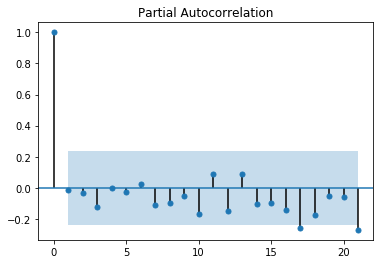

CONJUNTO DE PUNTOS (SERVICIOS)

[ 1.         -0.01757313 -0.01738698 -0.02302593 -0.02273922 -0.02564872
 -0.02624215 -0.02776748 -0.02830842 -0.0268913  -0.02819706 -0.0277337
 -0.03066851 -0.02476018 -0.02470266  0.14334491 -0.02515513 -0.03103118
 -0.02412114 -0.02529989 -0.02639873 -0.025982   -0.02749638 -0.02805139
 -0.0285402  -0.02920975 -0.02910456 -0.03063638 -0.03132947 -0.03139506
 -0.02970913 -0.02328671 -0.02868406 -0.01809181 -0.0208602   0.37235795
 -0.01109451 -0.01221821 -0.01271425 -0.00864652 -0.01340749]


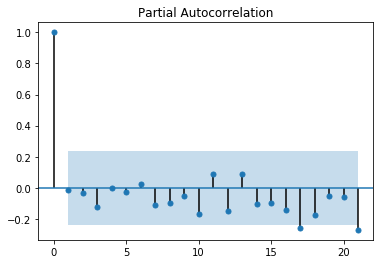

In [71]:
def ajuste():
    
    media, desviacion = st.norm.fit(y)#Ajusta los datos con respecto a la distribución normal
    d, pvalor = st.kstest(y,"norm",args=(media,desviacion))

    print ("\n")
    # queremos confianza al 95%
    print ("\nTIEMPOS DE LLEGADA")
    if pvalor > 0.05:
        print("p-valor: ", pvalor)#Valor de probabilidad, se usa para el contraste de la hipotesis y debe estar entre 0 y 1
        print("Hipotesis Nula")
    else:
        print("p-valor: ", pvalor)
        print("Hipotesis Alternativa")

    print ("\n")

    media, desviacion = st.norm.fit(si)#Ajusta los datos con respecto a la distribución normal
    d, pvalor = st.kstest(y,"norm",args=(media,desviacion))

    # queremos confianza al 95%
    print ("\nTIEMPOS DE SERVICIOS")
    if pvalor > 0.05:
        print("p-valor: ", pvalor)#Valor de probabilidad, se usa para el contraste de la hipotesis y debe estar entre 0 y 1
        print("Hipotesis Nula")
    else:
        print("p-valor: ", pvalor)
        print("Hipotesis Alternativa")

#Ajuste
ajuste()

def autocorrela():
    print ("\n\nCONJUNTO DE PUNTOS (LLEGADAS)\n")
    print (sm.graphics.tsa.acf(y))
    sm.graphics.tsa.plot_pacf(y, lags = 21, alpha = 0.05)
    plt.show() 

    print ("CONJUNTO DE PUNTOS (SERVICIOS)\n")
    print (sm.graphics.tsa.acf(si))
    sm.graphics.tsa.plot_pacf(y, lags = 21, alpha = 0.05)
    plt.show()
    
autocorrela()


# Encontrar la distribucción que se ajuste más a los datos

In [72]:
distributions = [

    "norm",            #Normal (Gaussian)
    "alpha",           #Alpha
    "anglit",          #Anglit
    "beta",            #Beta
    "betaprime",       #Beta Prime
    "bradford",        #Bradford
    "burr",            #Burr
    "cauchy",          #Cauchy
    "chi2",            #Chi-squared
    "cosine",          #Cosine
    "dgamma",          #Double Gamma
    "dweibull",        #Double Weibull
    "expon",           #Exponential
    "exponweib",       #Exponentiated Weibull
    "exponpow",        #Exponential Power
    "exponnorm",
    "fatiguelife",     #Fatigue Life (Birnbaum-Sanders)
    "foldcauchy",      #Folded Cauchy
    "fisk",            #Fisk
    "gamma",           #Gamma
    "gausshyper",      #Gauss Hypergeometric
    "genexpon",        #Generalized Exponential
    "genextreme",      #Generalized Extreme Value
    "gengamma",        #Generalized gamma
    "genlogistic",     #Generalized Logistic
    "genpareto",       #Generalized Pareto
    "genhalflogistic", #Generalized Half Logistic
    "gilbrat",         #Gilbrat
    "gompertz",        #Gompertz (Truncated Gumbel)
    "gumbel_l",        #Left Sided Gumbel, etc.
    "gumbel_r",        #Right Sided Gumbel
    "halfcauchy",      #Half Cauchy
    "halflogistic",    #Half Logistic
    "halfnorm",        #Half Normal
    "hypsecant",       #Hyperbolic Secant
    "invgamma",        #Inverse Gamma
    "invweibull",      #Inverse Weibull
    "johnsonsb",       #Johnson SB
    "johnsonsu",       #Johnson SU
    "laplace",         #Laplace
    "logistic",        #Logistic
    "loggamma",        #Log-Gamma
    "loglaplace",      #Log-Laplace (Log Double Exponential)
    "lognorm",         #Log-Normal
    "lomax",           #Lomax (Pareto of the second kind)
    "maxwell",         #Maxwell
    "mielke",          #Mielke's Beta-Kappa
    "nakagami",        #Nakagami
    "ncx2",            #Non-central chi-squared
    "ncf",             #Non-central F
    "nct",             #Non-central Student's T
    "pareto",          #Pareto
    "powerlaw",        #Power-function
    "powerlognorm",
    "rdist",           #R distribution
    "rayleigh",        #Rayleigh
    "rice",            #Rice
    "recipinvgauss",   #Reciprocal Inverse Gaussian
    "semicircular",    #Semicircular
    "t",               #Student's T
    "triang",          #Triangular
    "truncexpon",      #Truncated Exponential
    "tukeylambda",     #Tukey-Lambda
    "uniform",         #Uniform
    "wald",            #Wald
    "weibull_min",     #Minimum Weibull (see Frechet)
    "kstwobign"        #Kolmogorov-Smirnov two-sided test for Large N
]

def distribuciones(data):
    params={}
    dist_results = [] #Se crea una lista para guardar los nombres y valores de cada distribución
    for dist_name in distributions:
        
        warnings.filterwarnings('ignore')#Se ignoran las advertencias sobre impresiones de distribuciones
        dist = getattr(st, dist_name)
        param = dist.fit(data)
        params[dist_name] = param
        D, p = st.kstest(data, dist_name, args=param)#kolmogorov smirnov test
        dist_results.append((dist_name,p))#Guardamos nombre y valor de las distribuciones
    aux_p = 0
    aux_dist = ""
    for dist in dist_results:
        if(aux_p<dist[1]):
            aux_p = dist[1]
            aux_dist = dist[0]#Arreglamos para sacar el valor más optimo con su respectivo nombre y se guardan en auxiliares
        
    
    print("\nThe distribution associated with the dataset is {0} with p value {1}".format(aux_dist,aux_p))
    
    if aux_p > 0.05:    
        print("Hipotesis Nula") #validaciones
    else:
        print("Hipotesis Alternativa")
    return (aux_dist,params[aux_dist])

# Aplicación de funciones para poder realizar replicas, con respecto a las distribucciones que más se ajustaron a los datos 

In [73]:
def randomTime(arrive_distN, service_distN, paraml, params):
    
    a_l=[]
    s_l=[]
    i=0
    paramel = paraml#[arrive_distN] #arrive_distN
    parames = params#[service_distN] #service_distN
    distr_l= getattr(sp.stats, arrive_distN)
    distr_s= getattr(sp.stats, service_distN)
    while(i < 36.5):
            i+=distr_l.rvs(*paramel[:-2],loc=paramel[-2], scale=paramel[-1])
            s_l.append(distr_s.rvs(*parames[:-2], loc=parames[-2], scale=parames[-1]))
            a_l.append(i)
            
    return a_l, s_l

def repeticiones(arrive_distN, service_distN, paraml, params):
        
    #Replicas para los estadisiticos de trabajo
    av_a_ai = []
    av_di = []
    av_si = []
    av_w = []
    av_a_rate = []
    av_s_rate = []
    work = []
    #Replicas para los estadisiticos de tiempo
    q = []
    x = []
    l = []
    
    for i in range(1000):
        
        a_l, s_l = randomTime(arrive_distN, service_distN, paraml, params)
        di,Co = SSS(ai,si) #De la funcion SSS retornamos los valores de di Co
        job = len(a_l)
        work.append(job)
        av_a_ai.append((a_l[job-1])/job)
        av_di.append(sum(di)/job)
        av_si.append(sum(s_l)/job)
        av_w.append((av_si[i]+av_di[i]))
        
        av_a_rate.append(1/av_a_ai[i])
        av_s_rate.append(1/av_si[i])
        
        q.append((job/Co)*av_di[i])
        x.append((job/Co)*av_si[i])
        l.append(q[i]+x[i])

    #Impresion de datos
    print ("\n\t\t\t***WORK STATISTICAL AVERAGES***\n")

    print("The statistical values are given in a list of 3 [mean, initial, final]\n")

    print("Average interarrival: {0}\nAverage Delay: {1}\nAverage service time: {2}".format(confidence_interval(av_a_ai),confidence_interval(av_di),confidence_interval(av_si)))
    print("Wait in node:{0}\nArrival rate {1}\nService Rate: {2}\nJobs Served: {3}".format(confidence_interval(av_w),confidence_interval(av_a_rate),confidence_interval(av_s_rate),confidence_interval(work)))

    print ("\n\t\t\t***TIME STATISTICAL AVERAGES***\n")
    print("Number of jobs in the queue: {0}\nNumber of jobs in service: {1}\nNumber of jobs in the service node: {2}".format(confidence_interval(q),confidence_interval(x),confidence_interval(l)))

    print ("\n")
    
repeticiones(arrivenameD, servicenameD,arrivepar, servicepar)
print ("\n\t\t\tBEST DISTRIBUTION FOR 'LLEGADAS'")
arrivenameD, arrivepar = distribuciones(y)
print ("\n\t\t\tBEST DISTRIBUTION FOR 'SERVICIOS'")
servicenameD, servicepar = distribuciones(si)


			***WORK STATISTICAL AVERAGES***

The statistical values are given in a list of 3 [mean, initial, final]

Average interarrival: (0.5727585581126917, 0.5646730363670669, 0.5808440798583165)
Average Delay: (13.4752287734337, 13.28658056121504, 13.663876985652362)
Average service time: (0.32560253876626744, 0.2940892275767065, 0.35711584995582835)
Wait in node:(13.800831312199968, 13.612204557803137, 13.989458066596798)
Arrival rate (1.8275904585735212, 1.8042913341169358, 1.8508895830301066)
Service Rate: (5.324824978841822, 5.14407489019189, 5.505575067491755)
Jobs Served: (68.663, 67.79771229187031, 69.52828770812968)

			***TIME STATISTICAL AVERAGES***

Number of jobs in the queue: (18.818106402394278, 18.818106402394278, 18.818106402394278)
Number of jobs in service: (0.49033035900614486, 0.43432473322264464, 0.5463359847896451)
Number of jobs in the service node: (19.308436761400422, 19.252431135616924, 19.36444238718392)



			BEST DISTRIBUTION FOR 'LLEGADAS'

The distribution a

# Leonardo David Monsalvo Camacho
# Daniel Eduardo Berrío Beltrán 